<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Analisis-de-Datos-con-Python/5_Distribuciones_muestrales_y_tecnicas_de_evaluacion_de_modelos/s5_r2_error_estandar_e_intervalos_de_confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a calcular e interpretar errores estándar e intervalos de confianza
 
---
    
### 2. Desarrollo:

Para este Reto de nuevo podrás elegir el dataset de tu agrado. Elige un dataset o una variable distinta que la del Reto anterior. Recuerda ordenar y explicar bien tu análisis para que sea comprensible para los demás. Una vez que hayas elegido un dataset y una variable que te parezcan interesantes, realiza los siguientes pasos:

1. Primero explora tu variable con los métodos tradicionales: estimados de locación y dispersión, histograma, etc.
2. Ahora usa la técnica de bootstrap para obtener la distribución muestral de la media y de la mediana de tu variable. Elige los parámetros más adecuados para el bootstrap basándote en los resultados obtenidos en el Reto anterior.
3. Grafica la distribución muestral de la media y la mediana.
4. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
5. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.
6. Comparte tus hallazgos con tus compañeros.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Mean: ", df["blood_pressure"].mean())
print("Median: ", df["blood_pressure"].median())

Mean:  69.10546875
Median:  72.0


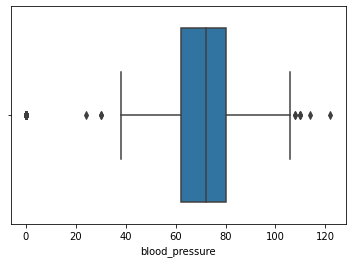

In [ ]:
sns.boxplot(x=df['blood_pressure'])

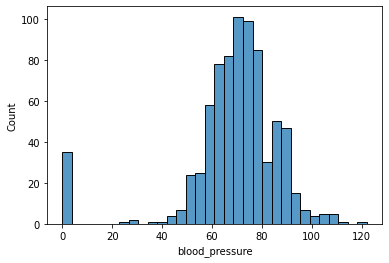

In [ ]:
sns.histplot(x=df['blood_pressure'])

Valor mínimo: 61.603896103896105
Valor máximo: 75.73376623376623
Rango: 14.129870129870127
Error estandar: 1.5549928108521203


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


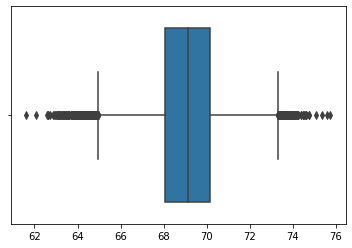

In [ ]:
blood_pressure = df['blood_pressure']

means = []

for i in range(100_000):
    sample = blood_pressure.sample(frac=0.2, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')
print(f'Error estandar: {serie_means.std()}')

sns.boxplot(serie_means);

Intervalo de 90% confianza de la media: 67.07142857142857 < 69.10546875 < 71.07142857142857
Intervalo de 90% confianza de la media: 69.10546875 +/- 2.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


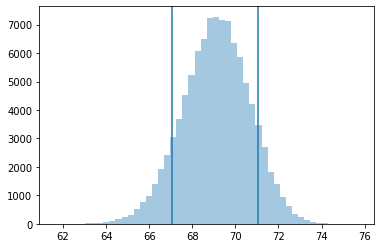

In [ ]:
limite_inferior = serie_means.quantile(0.1)
limite_superior = serie_means.quantile(0.9)
mean_of_intervals = ((blood_pressure.mean() - limite_inferior) + (limite_superior - blood_pressure.mean())) / 2

print(f'Intervalo de 90% confianza de la media: {limite_inferior} < {blood_pressure.mean()} < {limite_superior}')
print(f'Intervalo de 90% confianza de la media: {blood_pressure.mean()} +/- {mean_of_intervals}')


sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

Intervalo de 95% confianza de la media: 66.47402597402598 < 69.10546875 < 71.5909090909091
Intervalo de 95% confianza de la media: 69.10546875 +/- 2.558441558441558


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


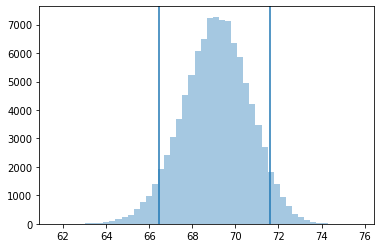

In [ ]:
limite_inferior = serie_means.quantile(0.05)
limite_superior = serie_means.quantile(0.95)
mean_of_intervals = ((blood_pressure.mean() - limite_inferior) + (limite_superior - blood_pressure.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {blood_pressure.mean()} < {limite_superior}')
print(f'Intervalo de 95% confianza de la media: {blood_pressure.mean()} +/- {mean_of_intervals}')


sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);


Intervalo de 90% confianza de la media: 65.32467532467533 < 69.10546875 < 72.54545454545455
Intervalo de 90% confianza de la media: 69.10546875 +/- 3.6103896103896105


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


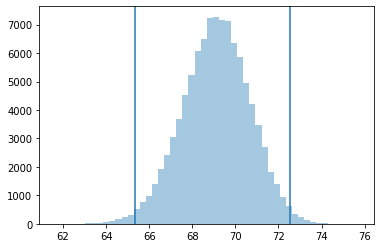

In [ ]:
limite_inferior = serie_means.quantile(0.01)
limite_superior = serie_means.quantile(0.99)
mean_of_intervals = ((blood_pressure.mean() - limite_inferior) + (limite_superior - blood_pressure.mean())) / 2

print(f'Intervalo de 90% confianza de la media: {limite_inferior} < {blood_pressure.mean()} < {limite_superior}')
print(f'Intervalo de 90% confianza de la media: {blood_pressure.mean()} +/- {mean_of_intervals}')


sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);
